In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/data_set/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# prompt: Using dataframe diabetes_dataset:

diabetes_dataset.groupby(['Outcome']).mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
diabetes_dataset.shape


(768, 9)

In [1]:
# prompt:
diabetes_dataset.describe()

NameError: name 'diabetes_dataset' is not defined

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

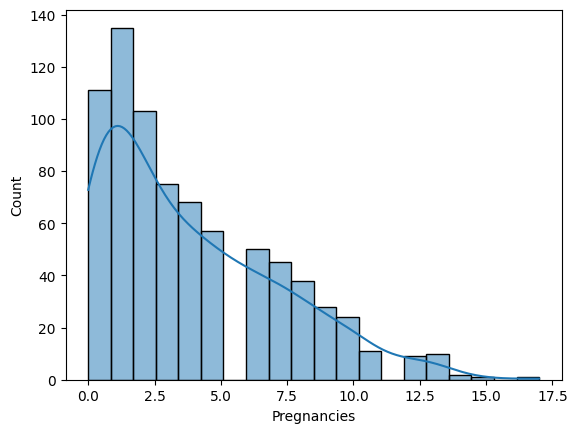

In [9]:
# Example: Visualize the distribution of 'y' values
sns.histplot(data=diabetes_dataset, x='Pregnancies', bins=20, kde=True)
plt.show()

In [10]:
#coloumn distribution
#missing value check

In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
# Count plots for categorical variables
categorical_cols = ['pregnancy', 'glucose']  # Replace with your categorical column names
for col in categorical_cols:
    sns.countplot(x=col, data='/content/drive/MyDrive/data_set/diabetes.csv')
    plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

In [19]:
def check_NaN(df):

   """ Checks for NaN in the pandas DataFrame and spits a DataFrame of report.
    Uses df.isnull() method.

    Parameters:
    ===========
    df = pandas.diabetes_dataset

    null_checking = []
    for column in df.columns:
        not_null = df[column].isnull().value_counts()[0]
        try:
            is_null = df[column].isnull().value_counts()[1]
        except:
            is_null = 0
        temp_dict = {'name': column, 'is_null': is_null, 'not_null': not_null}
        null_checking.append(temp_dict)"""
    df_ = pd.diabetes_dataset(null_checking)
    return df_
 # Assuming you have loaded your diabetes dataset into a DataFrame called 'diabetes_dataset'

# Call the check_NaN function with your DataFrame
nan_report = check_NaN(diabetes_dataset)

# Print the report
print(nan_report)


IndentationError: unexpected indent (<ipython-input-19-74d3749616a1>, line 19)

In [20]:
import pandas as pd

def check_NaN(df):
    """
    Checks for NaN in the pandas DataFrame and spits a DataFrame of report.
    Uses df.isnull() method.

    Parameters:
    ===========
    df : pandas.DataFrame
        The DataFrame to be checked for NaN values.
    """
    null_checking = []
    for column in df.columns:
        not_null = df[column].notnull().sum()
        is_null = df[column].isnull().sum()
        temp_dict = {'name': column, 'is_null': is_null, 'not_null': not_null}
        null_checking.append(temp_dict)
    df_ = pd.DataFrame(null_checking)
    return df_
nan_report = check_NaN(diabetes_dataset)
print(nan_report)


                       name  is_null  not_null
0               Pregnancies        0       768
1                   Glucose        0       768
2             BloodPressure        0       768
3             SkinThickness        0       768
4                   Insulin        0       768
5                       BMI        0       768
6  DiabetesPedigreeFunction        0       768
7                       Age        0       768
8                   Outcome        0       768


In [22]:
"""sanity check"""
df=diabetes_dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.duplicated().sum()

0

In [27]:
#garbage
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)


In [28]:
#stat
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
import warnings
warnings.filewarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histoplot(data=df,x=i)
  plt.show()

AttributeError: module 'warnings' has no attribute 'filewarnings'

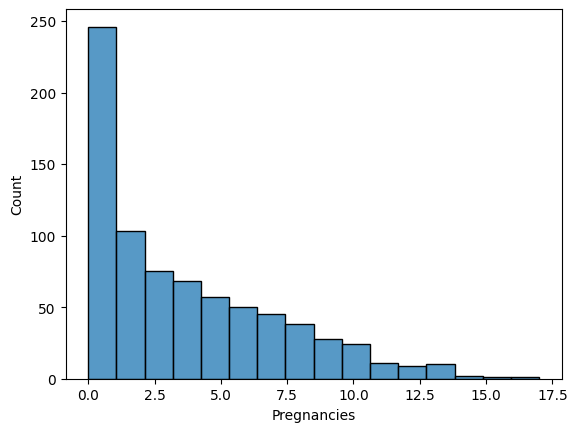

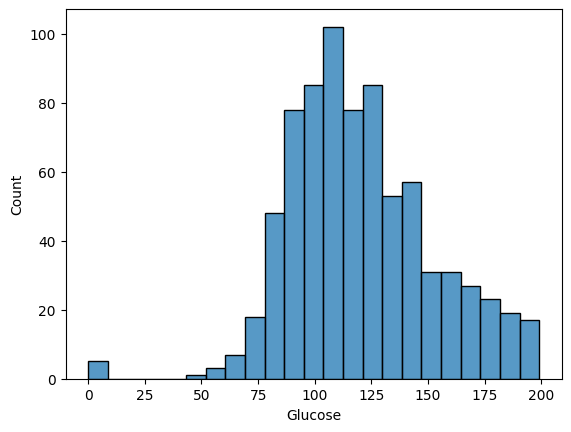

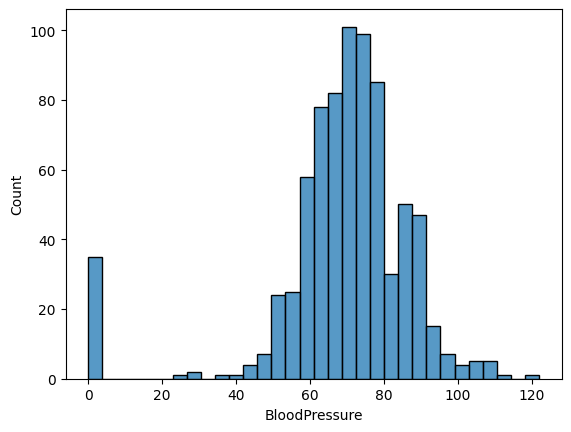

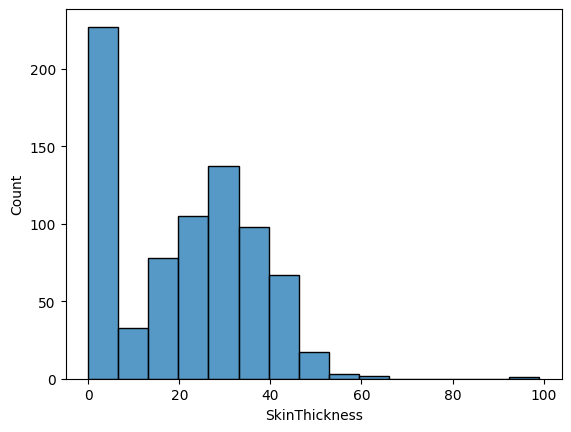

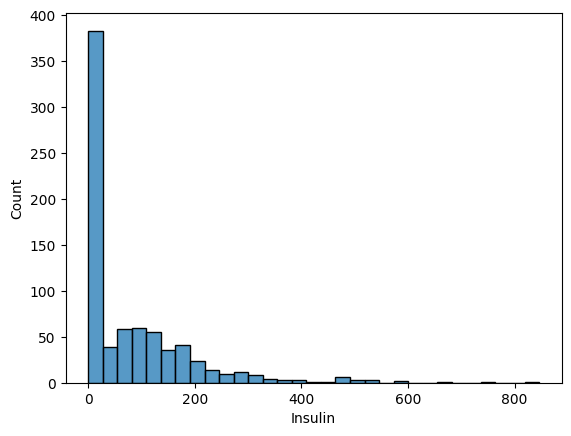

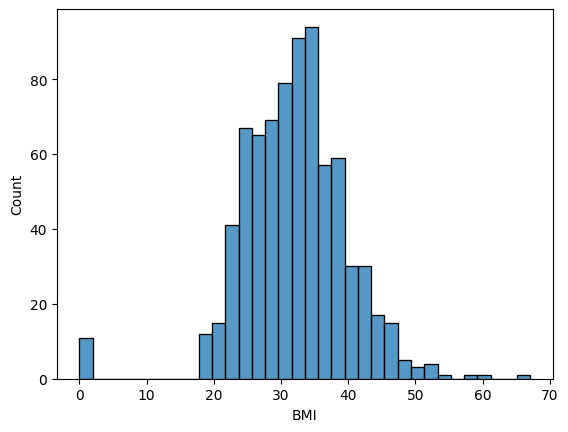

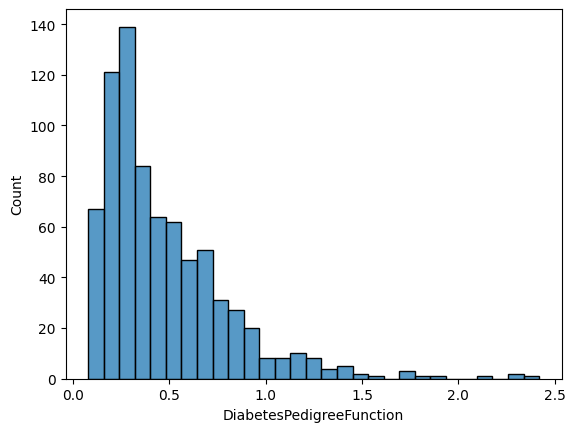

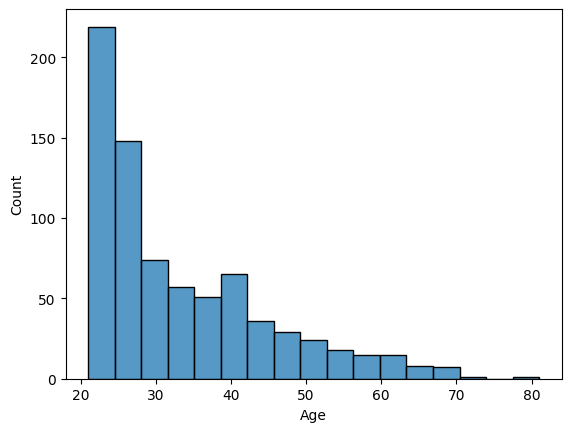

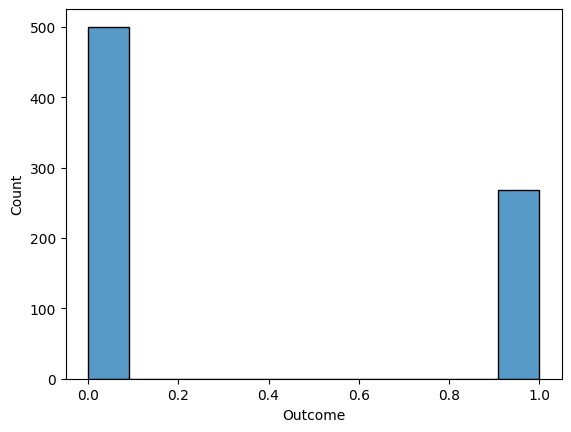

In [33]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

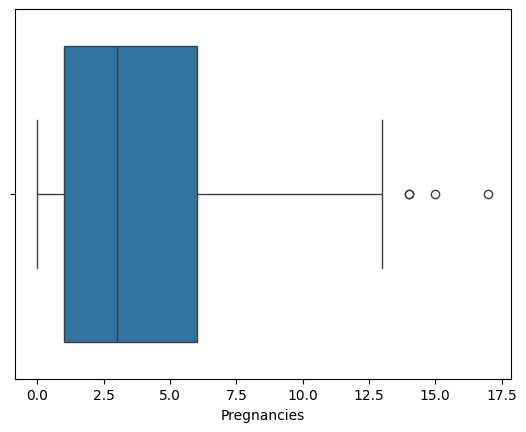

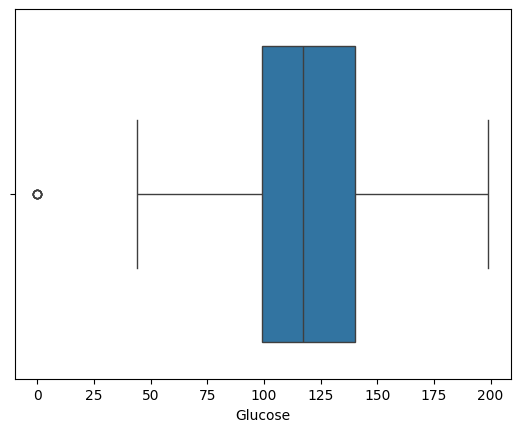

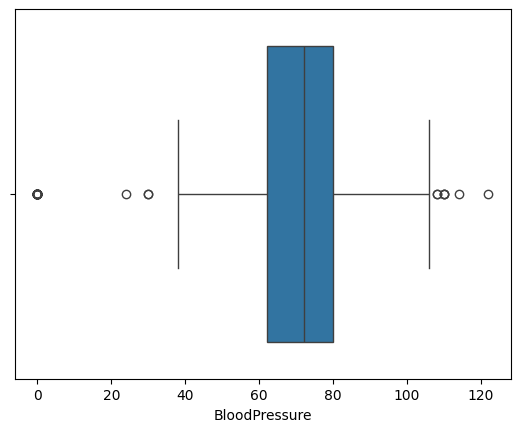

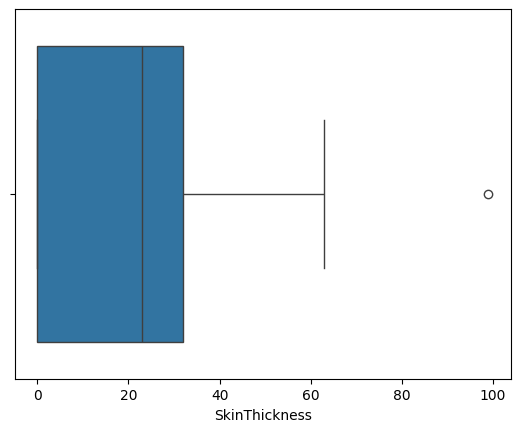

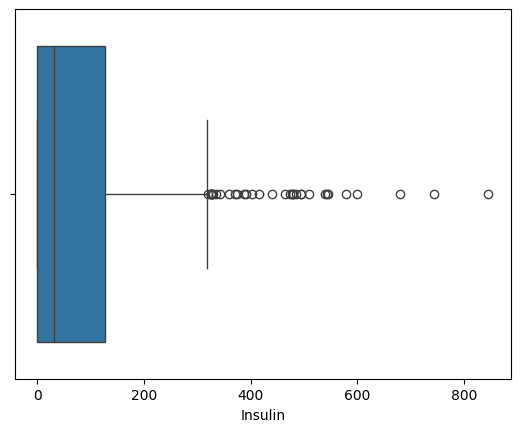

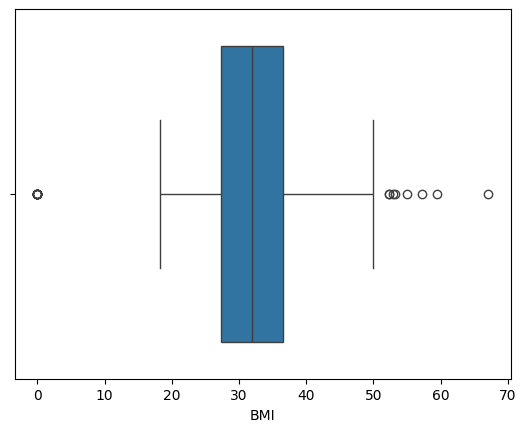

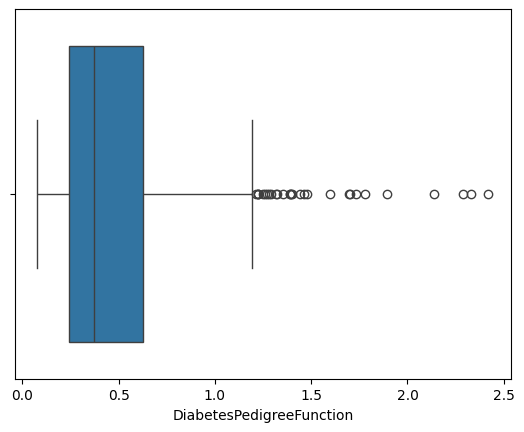

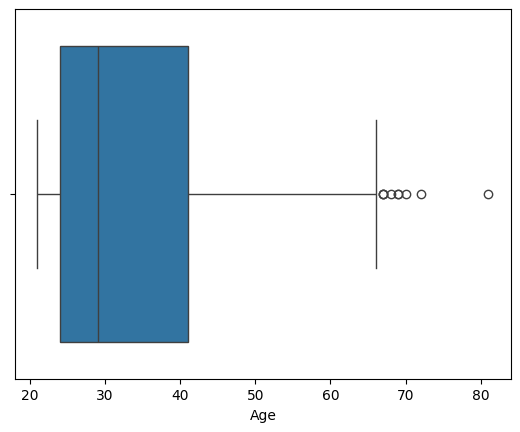

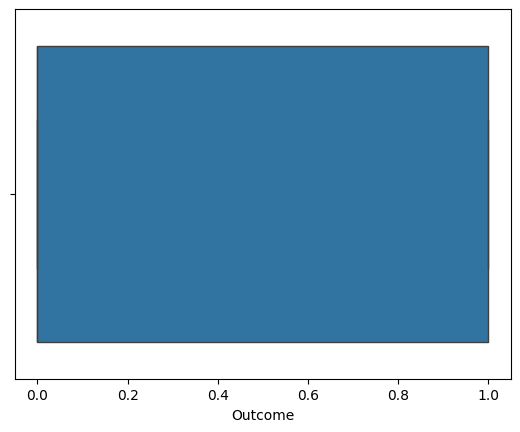

In [34]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

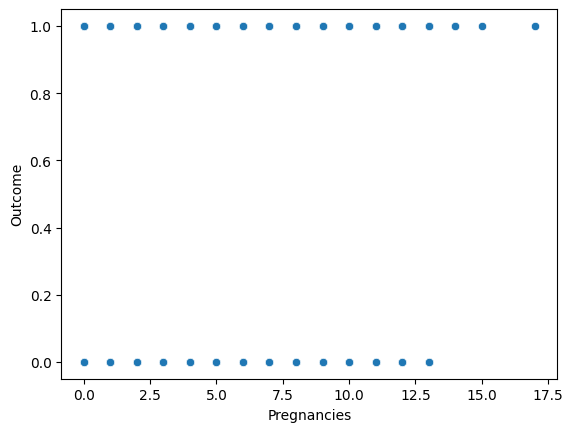

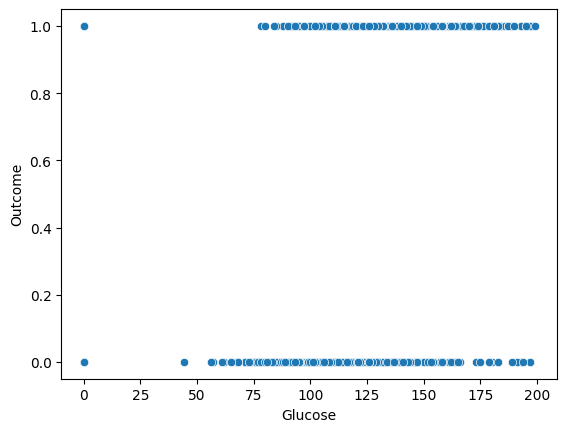

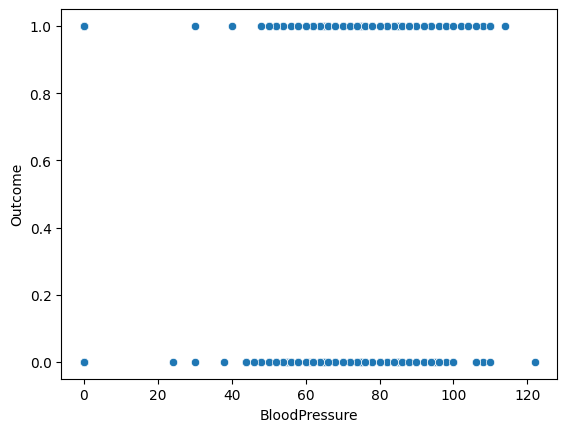

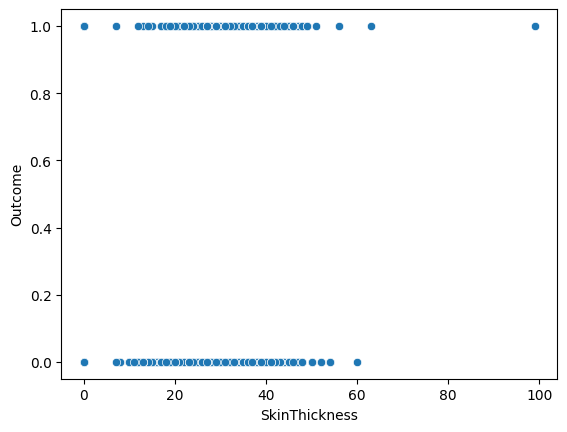

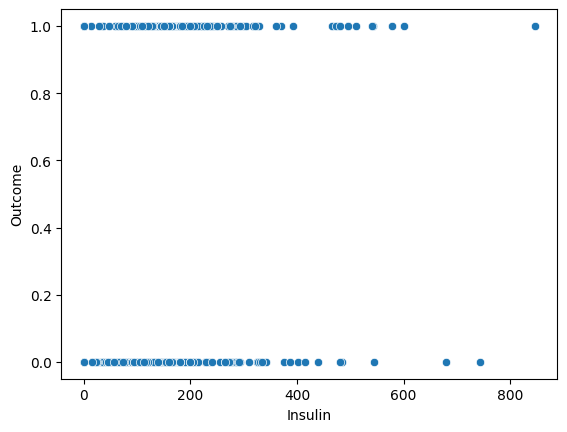

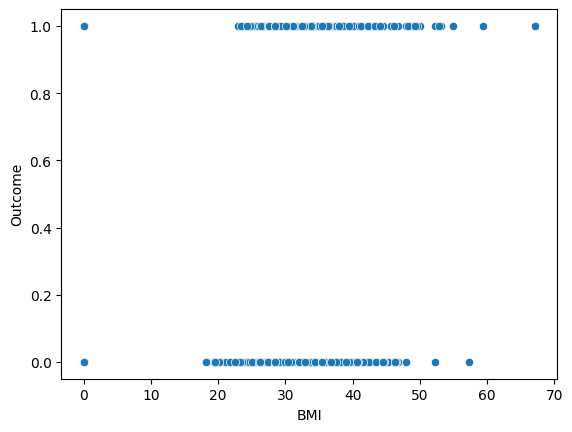

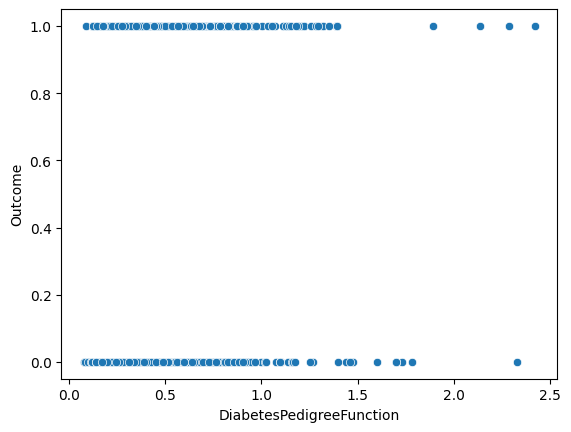

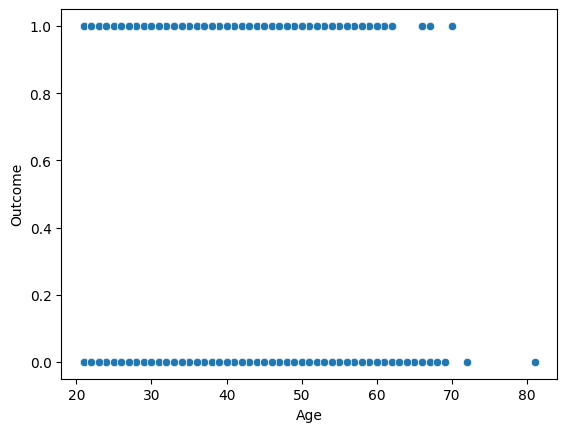

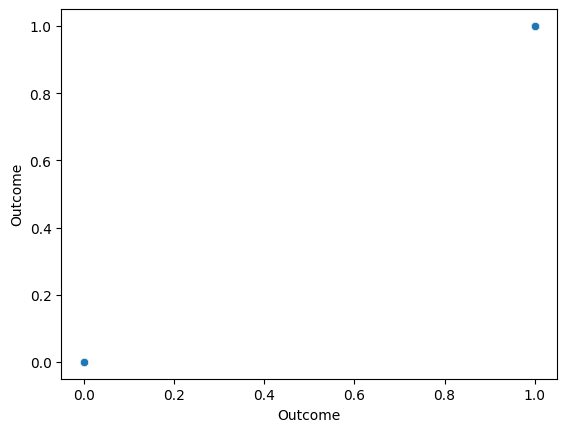

In [35]:
#scatter plot to understand the relationship
for i in df.select_dtypes(include="number").columns:
  sns.scatterplot(data=df,x=i,y='Outcome')
  plt.show()

<Axes: >

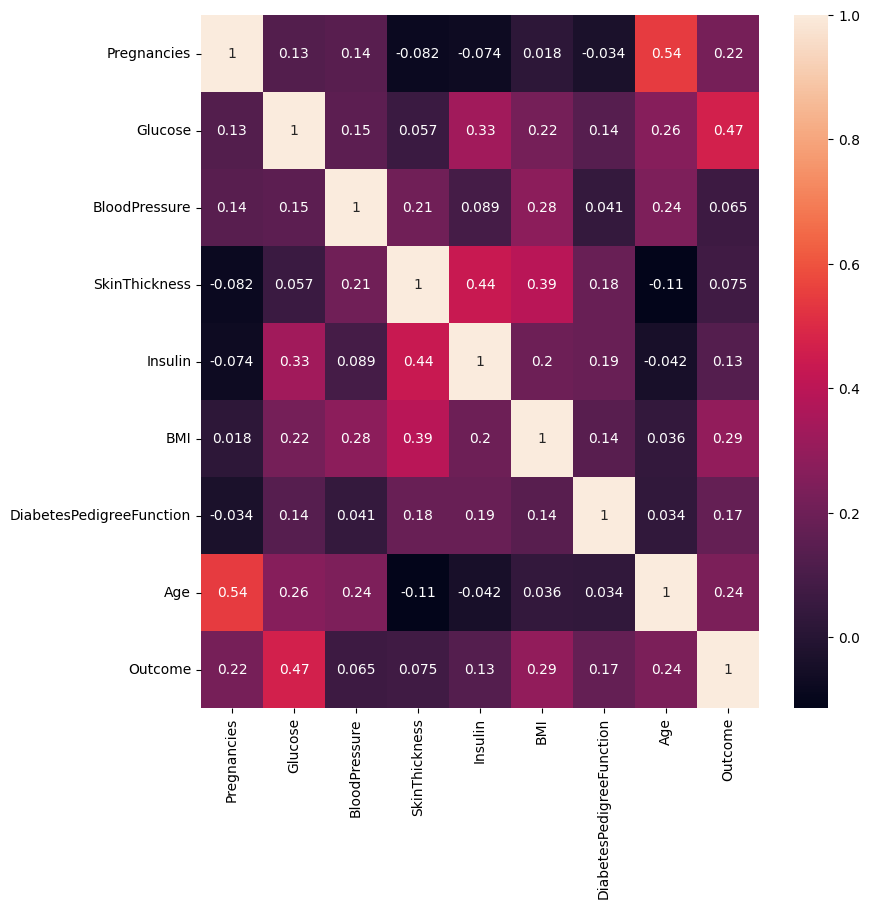

In [38]:
"""heatmap with correlation matrix"""
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64